In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
train_datagen = image.ImageDataGenerator(
                    rescale = 1./255,
                                       
)

val_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [3]:
train_generator = train_datagen.flow_from_directory(
  'CovidDataset/Train',
    target_size = (244,244),
    batch_size = 32,
    class_mode = 'binary'
)


Found 1146 images belonging to 2 classes.


In [4]:
##validation data generator
val_generator = val_datagen.flow_from_directory(
  'CovidDataset/Val',
    target_size = (244,244),
    batch_size = 32,
    class_mode = 'binary'
)

Found 201 images belonging to 2 classes.


In [5]:
#CNN based Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (244,244,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss = tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 59, 128)       0

In [6]:
hist = model.fit(train_generator, steps_per_epoch = 8, epochs = 6, validation_data = val_generator, validation_steps = 2 )

Epoch 1/6
8/8 [==============================] - 152s 19s/step - loss: 1.0861 - accuracy: 0.5039 - val_loss: 0.6670 - val_accuracy: 0.5938
Epoch 2/6
8/8 [==============================] - 151s 19s/step - loss: 0.5748 - accuracy: 0.7109 - val_loss: 0.4194 - val_accuracy: 0.7969
Epoch 3/6
8/8 [==============================] - 138s 17s/step - loss: 0.3983 - accuracy: 0.8477 - val_loss: 0.1749 - val_accuracy: 0.9531
Epoch 4/6
8/8 [==============================] - 96s 12s/step - loss: 0.2230 - accuracy: 0.9297 - val_loss: 0.2157 - val_accuracy: 0.9531
Epoch 5/6
8/8 [==============================] - 107s 13s/step - loss: 0.2885 - accuracy: 0.8828 - val_loss: 0.1723 - val_accuracy: 0.9062
Epoch 6/6
8/8 [==============================] - 115s 14s/step - loss: 0.2578 - accuracy: 0.9102 - val_loss: 0.2467 - val_accuracy: 0.9219


In [7]:
y_actual = []
y_test = []

In [8]:
for i in os.listdir("./CovidDataset/Test/Normal/"):
    img = image.load_img("./CovidDataset/Test/Normal/"+i, target_size = (244,244))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [9]:
for i in os.listdir("./CovidDataset/Test/Covid/"):
    img = image.load_img("./CovidDataset/Test/Covid/"+i, target_size = (244,244))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [10]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [11]:
cm = confusion_matrix(y_actual, y_test)

<AxesSubplot:>

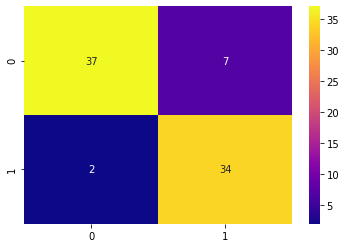

In [12]:
sns.heatmap(cm ,cmap='plasma', annot = True)
# y axis - actual
# x axis - precidted

In [13]:
#precision = 0.78
#recall = 1
f1_score = f1_score(y_actual, y_test,labels=None, pos_label=1, average='binary')
print(f1_score)

0.883116883116883
